# DATA ANALYSIS USING PYTHON PANDAS LIBRARY

Oct 2023 <br>
By Irina Overeem

We will be looking at data on river discharge of the Upper Colorado River. 
Tabular data like this with a combination of dates, name and data quality strings, and numbers are best handled by spreadsheets where entries such as dates and times are in some useful format. In Python the Python Data Analysis Library (a.k.a. Pandas) is really useful for this purpose.

I use one discharge data file downloaded for the USGS station at Kremmling, CO, for the Upper Colorado. 
And we will look at a file generated by a commonly used electronic setup - a campbell scientific datalogger.

In this notebook will use partially cleaned up files, because the headers in either the USGS files and to some extent also the Campbell stations is unique for each station, making it difficult to deal with it in an automated way. To prepare the file I cut of the header in a text-editor, cut the line that has 15 s ..., and saved it as a *.csv file. 

Python Learning Objectives:
1. Load csv data from a file using the Pandas library.
2. Get info on the data in a dataframe, access data in DataFrames.
3. Create plots of data in DataFrames.
4. Save figures to file.

In [78]:
# Set up with the modules we will use

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd


## SOME REVIEW NOTES FROM LAST WEEK

### Reading file data into a numpy array: loadtxt and genfromtxt

If our goal is to read the contents of a text file into a numpy array, numpy provides functions that makes this a bit easier:

`loadtxt()` - simple and effective when you have all numbers plus some comments or header lines <br>
`genfromtxt()` - useful when there are strings embedded in the data portion of the file <br>


In [109]:
help(np.loadtxt)

Help on function loadtxt in module numpy:

loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding='bytes', max_rows=None, *, quotechar=None, like=None)
    Load data from a text file.
    
    Each row in the text file must have the same number of values.
    
    Parameters
    ----------
    fname : file, str, pathlib.Path, list of str, generator
        File, filename, list, or generator to read.  If the filename
        extension is ``.gz`` or ``.bz2``, the file is first decompressed. Note
        that generators must return bytes or strings. The strings
        in a list or produced by a generator are treated as lines.
    dtype : data-type, optional
        Data-type of the resulting array; default: float.  If this is a
        structured data-type, the resulting array will be 1-dimensional, and
        each row will be interpreted as an element of the array.  In this
        case, the number 

In [110]:

#Example of loadtxt on glacial data
#Our file has 2 header lines that we need to skip; we use the skiprows parameter
#It is comma-separated; we use the delimiter parameter

har = np.loadtxt("hardangerjokulen2006-2007.csv", skiprows=2, delimiter=",")
print(har)

[[ 1.850e+03  1.865e+03  9.000e-02  2.700e+00 -1.450e+00]
 [ 1.800e+03  1.850e+03  3.930e+00  3.450e+00 -1.500e+00]
 [ 1.750e+03  1.800e+03  4.030e+00  3.600e+00 -1.600e+00]
 [ 1.700e+03  1.750e+03  3.460e+00  3.500e+00 -1.750e+00]
 [ 1.650e+03  1.700e+03  1.940e+00  3.200e+00 -1.900e+00]
 [ 1.600e+03  1.650e+03  7.500e-01  2.700e+00 -2.100e+00]
 [ 1.550e+03  1.600e+03  5.900e-01  2.350e+00 -2.300e+00]
 [ 1.500e+03  1.550e+03  5.700e-01  1.950e+00 -2.500e+00]
 [ 1.450e+03  1.500e+03  2.900e-01  1.730e+00 -2.700e+00]
 [ 1.400e+03  1.450e+03  1.900e-01  1.560e+00 -2.950e+00]
 [ 1.350e+03  1.400e+03  1.000e-01  1.390e+00 -3.200e+00]
 [ 1.300e+03  1.350e+03  1.000e-01  1.220e+00 -3.450e+00]
 [ 1.250e+03  1.300e+03  2.700e-01  1.050e+00 -3.700e+00]
 [ 1.200e+03  1.250e+03  3.600e-01  8.000e-01 -3.950e+00]
 [ 1.150e+03  1.200e+03  2.800e-01  5.500e-01 -4.250e+00]
 [ 1.100e+03  1.150e+03  1.100e-01  3.000e-01 -4.550e+00]
 [ 1.020e+03  1.100e+03  5.000e-02 -5.000e-02 -4.900e+00]]


### What is the Pandas Module?

The Python module **Pandas** is designed to efficiently work with tabular data.

DataFrame: a two-dimensional data structure that holds data like a two-dimension array or a table with rows and columns.

### load a csv-file into a pandas dataframe

In [79]:
# read the data file posted with this excercise into a pandas dataframe

data = pd.read_csv('USGS09058000_discharge_NoHead_20112021.csv')

# print the first five lines to see whether it populated the fields
# with the head() method, you can see the structure of the data without having to print the entire dataframe.

print(data)


     agency_cd  site_no datetime  discharge-cuft
0         USGS  9058000   1/1/11           311.0
1         USGS  9058000   1/2/11           348.0
2         USGS  9058000   1/3/11           387.0
3         USGS  9058000   1/4/11           378.0
4         USGS  9058000   1/5/11           381.0
...        ...      ...      ...             ...
3907      USGS  9058000  9/12/21          1110.0
3908      USGS  9058000  9/13/21          1060.0
3909      USGS  9058000  9/14/21          1070.0
3910      USGS  9058000  9/15/21          1010.0
3911      USGS  9058000  9/16/21           975.0

[3912 rows x 4 columns]


We have just created a Data Frame.<br>

A DataFrame is a 2-dimensional data structure that can store data of different types (including characters, integers, floating point values, factors and more) in columns. It is similar to a spreadsheet, or an database/ SQL table.

To get quick insight in what is in a dataframe, you can use the head() method or the tail() method.

You can check the type of the object data using the type module. The type() method or the  __class__ attribute tell us what type of object the variable points to.

Then: each column in a DataFrame also has its own type. We can use data.dtypes to view the data type for each column. int64 are numeric integer values, object are strings (letters and numbers), and float64 are numbers with decimals.

In [80]:
# to get insight in the content of a dataframe, you can use the head() method or the tail() method:
data.head()
#data.tail()

,agency_cd,site_no,datetime,discharge-cuft
0,USGS,9058000,1/1/11,311.0
1,USGS,9058000,1/2/11,348.0
2,USGS,9058000,1/3/11,387.0
3,USGS,9058000,1/4/11,378.0
4,USGS,9058000,1/5/11,381.0


In [81]:
# the type() function works too

print(type(data))
print(data.__class__)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [82]:
# 

data.dtypes

agency_cd          object
site_no             int64
datetime           object
discharge-cuft    float64
dtype: object

In [83]:
# create a list with new column names as strings
new_column_names = ['Agency', 'SiteNo', 'OldDateTime', 'Discharge_cfs']

# assign the new column names to the dataframe
data.columns = new_column_names

The values in each column of a Pandas DataFrame can be accessed using the specific column name. <br>
If we want to access more than one column at once, we use a list of column names. 

In [84]:
# for example, if we just want to select the discharge in cu ft/sec
data[['Discharge_cfs']].head()

# or as a second example, we just want to select time and discharge
data[['OldDateTime','Discharge_cfs']].head()

,OldDateTime,Discharge_cfs
0,1/1/11,311.0
1,1/2/11,348.0
2,1/3/11,387.0
3,1/4/11,378.0
4,1/5/11,381.0


### Manipulating data in a dataframe

In [85]:
# Calculations
# We can also call the data using column names and manipulate the values in the column
# For example, here we convert the discharge from cubic feet per second to metric units m3/sec 

data['Discharge_m3sec'] = data['Discharge_cfs'] * 0.028316847 
data['Discharge_m3sec'].head()

len(data['Discharge_m3sec'])

data.head()

# So we added a column with the newly calculated parameter.

#INSTEAD You can also replace the existing values in Discharge_cfs column by setting the column name equal to the output of the applied function.

,Agency,SiteNo,OldDateTime,Discharge_cfs,Discharge_m3sec
0,USGS,9058000,1/1/11,311.0,8.806539
1,USGS,9058000,1/2/11,348.0,9.854263
2,USGS,9058000,1/3/11,387.0,10.958620
3,USGS,9058000,1/4/11,378.0,10.703768
4,USGS,9058000,1/5/11,381.0,10.788719


When Pandas imported the data, it read the station name (a number) as an integer and removed the initial zero. We can fix the station name by replacing the values of that column with a string.
Remember that the goal is to automate the process for multiple stations. Instead of writing the corrected station name ourselves, let’s build it from the values available in the DataFrame.

The Pandas method unique returns a numpy array of the unique elements in the DataFrame. We want the first (and only) entry in that array, which has the index 0. We can build a string with the correct station name by casting that value as a string and concatenating it with an initial zero.

We can replace all values in the ‘Station’ column with this string through assignment and check the object type of each column to make sure it is no longer an integer.

In [86]:
# manipulation of strings in one of the columns of the dataframe

new_station_name = "0" + str(data['SiteNo'].unique()[0])
data['SiteNo'] = new_station_name

data.head()

,Agency,SiteNo,OldDateTime,Discharge_cfs,Discharge_m3sec
0,USGS,09058000,1/1/11,311.0,8.806539
1,USGS,09058000,1/2/11,348.0,9.854263
2,USGS,09058000,1/3/11,387.0,10.958620
3,USGS,09058000,1/4/11,378.0,10.703768
4,USGS,09058000,1/5/11,381.0,10.788719


In [124]:
# max, min and basic stats can be easily found with a couple of math methods built into pandas

print(data['Discharge_m3sec'].max())
print(data['Discharge_m3sec'].min())

print(data['Discharge_m3sec'].mean())
print(data['Discharge_m3sec'].std())

# also very handy for inquiries is to find the index of these max values
peakflowindex=data['Discharge_m3sec'].idxmax()

print(peakflowindex)

peakflowday=data['DateTime'][peakflowindex]
print(peakflowday)




268.44370956
7.5322813019999995
32.47086175879339
37.15302599119729
176
2011-06-26 00:00:00


## Handling Date and Time stamps

Different programming languages and software packages handle date and time stamps in their own unique ways. Pandas has a set of functions for creating and managing timeseries.

We need to convert the USGS entries in the DateTime column into a format that Pandas can work with. Luckily, the to_datetime function in the Pandas library can convert it directly. Note that this conversion takes up a bit of time, wait till you see those first five lines reported....


In [87]:
# using the pd.to_datetime functionality

data['DateTime'] = pd.to_datetime(data['OldDateTime'])

data.head()

,Agency,SiteNo,OldDateTime,Discharge_cfs,Discharge_m3sec,DateTime
0,USGS,09058000,1/1/11,311.0,8.806539,2011-01-01
1,USGS,09058000,1/2/11,348.0,9.854263,2011-01-02
2,USGS,09058000,1/3/11,387.0,10.958620,2011-01-03
3,USGS,09058000,1/4/11,378.0,10.703768,2011-01-04
4,USGS,09058000,1/5/11,381.0,10.788719,2011-01-05


In [90]:
#The entries in our DataFrame data are indexed by the number in bold on the left side of each row. 
# We can display a slice of the data using index ranges:

data[0:5]

,Agency,SiteNo,OldDateTime,Discharge_cfs,Discharge_m3sec,DateTime
0,USGS,09058000,1/1/11,311.0,8.806539,2011-01-01
1,USGS,09058000,1/2/11,348.0,9.854263,2011-01-02
2,USGS,09058000,1/3/11,387.0,10.958620,2011-01-03
3,USGS,09058000,1/4/11,378.0,10.703768,2011-01-04
4,USGS,09058000,1/5/11,381.0,10.788719,2011-01-05


 ## <font color = green> IN-CLASS PRACTICE </font> 

Can you print out the river discharge on 1/10/11?
Can you print out the very last entry in the dataset? When was this?

In [111]:
# your print statements here

data["Discharge_m3sec"][9]

#last=(len(data))-1

#print(data["Discharge_m3sec"][last])
#print(data["DateTime"][last])


KeyError: -1

## Creating data subsets and removing columns

We can select specific ranges of our data in both the row and column directions using either label or integer-based indexing.

loc: indexing via labels or integers <br>
iloc: indexing via integers <br>

To select a subset of rows AND columns from our DataFrame, we can use the loc method and the integer indices for both rows and columns. 

In [93]:
data.loc[0:2, ['DateTime', 'Discharge_m3sec']]

,DateTime,Discharge_m3sec
0,2011-01-01,8.806539
1,2011-01-02,9.854263
2,2011-01-03,10.958620


In [94]:
data.iloc[0:2,-2:]

,Discharge_m3sec,DateTime
0,8.806539,2011-01-01
1,9.854263,2011-01-02


In [95]:
print('With iloc:', data.iloc[0:2,-2:].shape)
print('With loc:', data.loc[0:2, ['DateTime', 'Discharge_m3sec']].shape)

With iloc: (2, 2)
With loc: (3, 2)


Since we can call individual columns (or lists of columns) from a DataFrame, the simplest way to remove columns is by creating a new DataFrame with only the columns we want.

In [96]:
discharge_data = data[['DateTime', 'Discharge_m3sec']]
discharge_data.head()

,DateTime,Discharge_m3sec
0,2011-01-01,8.806539
1,2011-01-02,9.854263
2,2011-01-03,10.958620
3,2011-01-04,10.703768
4,2011-01-05,10.788719


In [134]:
# it is possible to separate components of the date time
# here we use dt.year to just select the year in a separate column
data['year'] = data['DateTime'].dt.year
data.head()


#Q2011=  data[data.year == 2011]
#print(Q2011)

    Agency    SiteNo OldDateTime  Discharge_cfs  Discharge_m3sec   DateTime  \
0     USGS  09058000      1/1/11          311.0         8.806539 2011-01-01   
1     USGS  09058000      1/2/11          348.0         9.854263 2011-01-02   
2     USGS  09058000      1/3/11          387.0        10.958620 2011-01-03   
3     USGS  09058000      1/4/11          378.0        10.703768 2011-01-04   
4     USGS  09058000      1/5/11          381.0        10.788719 2011-01-05   
..     ...       ...         ...            ...              ...        ...   
360   USGS  09058000    12/27/11          423.0        11.978026 2011-12-27   
361   USGS  09058000    12/28/11          423.0        11.978026 2011-12-28   
362   USGS  09058000    12/29/11          423.0        11.978026 2011-12-29   
363   USGS  09058000    12/30/11          427.0        12.091294 2011-12-30   
364   USGS  09058000    12/31/11          418.0        11.836442 2011-12-31   

     year  
0    2011  
1    2011  
2    2011  
3  

 ## <font color = green> IN CLASS PRACTICE </font> 

First, use the iloc method to create a new dataframe that has DateTime and Discharge over just 2020. 
To check whether you have selected indeed the whole year, print out the last 12 values of the newly created data frame.

Then use the dt.year functionality to create a new dataframe that has DateTime and Discharge over just 2019. 

In [135]:
# your code here using iloc


In [136]:
# your code using the dt.year functionality


## Creating Plots of Pandas Dataframes

Pandas is well integrated with the matplotlib library that we used earlier in the tutorials. 
We can either use the same functions we used before with to plot data in NumPy arrays or we can use the plotting functions built into Pandas.

Text(0.5, 1.0, 'Gauging Station 09058000')

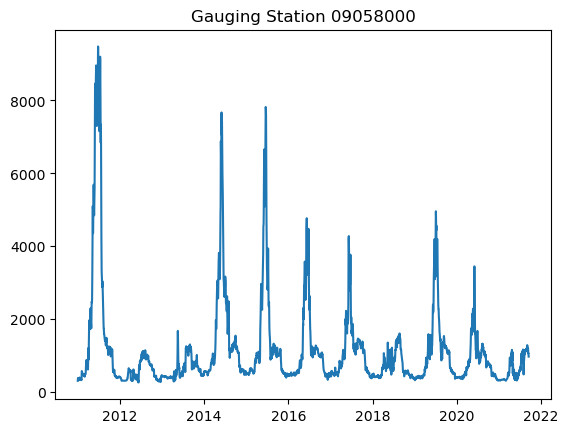

In [97]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters 
register_matplotlib_converters()

plt.plot(data['DateTime'], data['Discharge_cfs'])
plt.title('Gauging Station ' + data['SiteNo'][0])

<Axes: title={'center': 'Station 009058000'}, xlabel='DateTime'>

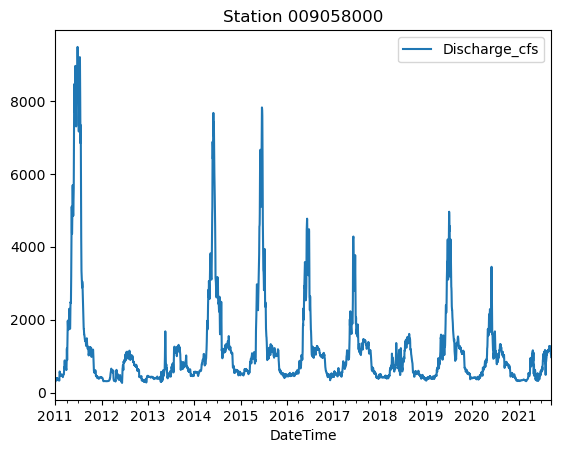

In [55]:
data.plot(x='DateTime', y='Discharge_cfs', title='Station ' + data['SiteNo'][0])

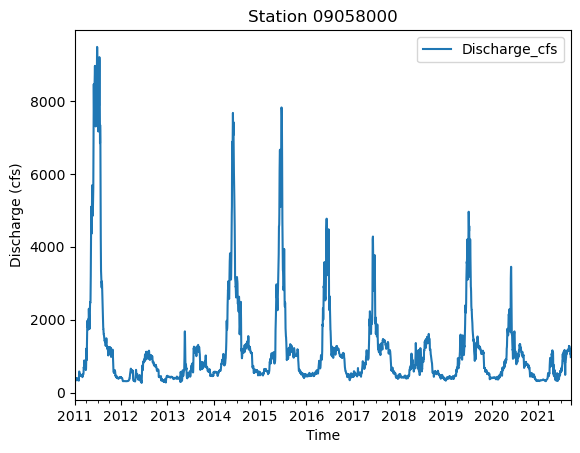

In [98]:
data.plot(x='DateTime', y='Discharge_cfs', title='Station ' + data['SiteNo'][0])
plt.xlabel('Time')
plt.ylabel('Discharge (cfs)')

# to save your figure to a file, specify a name before the final plotting command
plt.savefig('USGStestplot.png')

plt.show()

 ## <font color = green> IN-CLASS PRACTICE </font> 

1. make a plot of discharge over 2019 only
2. relabel the title to call this USGS station at Kremmling, CO
3. plot the line in black
4. save your figure to a png file


In [ ]:
# your code goes here

## Using Logical Operators with DataFrames to Filter Values

Another useful data wrangling option is the ability to filter data from an existing pandas dataframe.

Filtering data is easily done using dataframe.column_name == "value". Your output will contain all rows that meet the criteria.

For example, you can filter using a comparison operator on numeric values. For example, you can select all rows from the dataframe that have discharge greater than 8500 cfs by filtering on the Discharge_in_cfs column.



In [101]:
# create new dataframe from filter on values in the `Discharge_cfs` column greater than 8500 cfs

High_discharge_days = data[data.Discharge_cfs > 8500]

# print new dataframe
High_discharge_days

,Agency,SiteNo,OldDateTime,Discharge_cfs,Discharge_m3sec,DateTime
157,USGS,09058000,6/7/11,8740.0,247.489243,2011-06-07
158,USGS,09058000,6/8/11,8840.0,250.320927,2011-06-08
159,USGS,09058000,6/9/11,8960.0,253.718949,2011-06-09
160,USGS,09058000,6/10/11,8720.0,246.922906,2011-06-10
161,USGS,09058000,6/11/11,8610.0,243.808053,2011-06-11
174,USGS,09058000,6/24/11,8710.0,246.639737,2011-06-24
175,USGS,09058000,6/25/11,9260.0,262.214003,2011-06-25
176,USGS,09058000,6/26/11,9480.0,268.443710,2011-06-26
177,USGS,09058000,6/27/11,9460.0,267.877373,2011-06-27
178,USGS,09058000,6/28/11,9140.0,258.815982,2011-06-28


 ## <font color = green> IN-CLASS PRACTICE </font> 
 
1. what is the lowest flow recorded at the Kremmling USGS station?
2. Use the `nsmallest` method to create new dataframe from filter on values in the `Discharge_cfs` column that captures the 10 lowest flow days.


In [106]:
# your code here

data.Discharge_cfs.min()

low_flow = data.nsmallest(1, "Discharge_cfs")
print("The lowest flow recorded,", low_flow["Discharge_cfs"].item(), "cfs, occurred on", low_flow["DateTime"].item())

data.nsmallest(10, "Discharge_cfs")
#print("The tenth lowest flow is 308.8 cfs")

ten_lowest = data[data.Discharge_cfs < 309]
print(ten_lowest)



The lowest flow recorded, 266.0 cfs, occurred on 2012-06-11 00:00:00
    Agency    SiteNo OldDateTime  Discharge_cfs  Discharge_m3sec   DateTime
475   USGS  09058000     4/20/12          304.0         8.608321 2012-04-20
522   USGS  09058000      6/6/12          294.0         8.325153 2012-06-06
525   USGS  09058000      6/9/12          308.0         8.721589 2012-06-09
526   USGS  09058000     6/10/12          280.0         7.928717 2012-06-10
527   USGS  09058000     6/11/12          266.0         7.532281 2012-06-11
701   USGS  09058000     12/2/12          308.0         8.721589 2012-12-02
703   USGS  09058000     12/4/12          292.0         8.268519 2012-12-04
704   USGS  09058000     12/5/12          292.0         8.268519 2012-12-05
718   USGS  09058000    12/19/12          278.0         7.872083 2012-12-19
833   USGS  09058000     4/13/13          292.0         8.268519 2013-04-13
839   USGS  09058000     4/19/13          306.0         8.664955 2013-04-19


In [ ]:
# your code goes here